# Chapter 1 : Introduction to Networkx

## Plot Graphs

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(G, pos_nodes, node_names=None, node_size=50, plot_weight=False):
    # Draw nodes and edges without labels
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    # Adjust label positions slightly above the nodes
    pos_labels = {node: (x, y + 0.08) for node, (x, y) in pos_nodes.items()}
    
    # Use provided node names if given; otherwise use node IDs as labels
    if node_names:
        labels = {node: node_names.get(node, str(node)) for node in G.nodes()}
    else:
        labels = {node: str(node) for node in G.nodes()}
    
    # Draw node labels
    nx.draw_networkx_labels(G, pos_labels, labels=labels, font_family='serif', font_size=20)

    # Optionally draw edge weights
    if plot_weight:
        edge_labels = {(a, b): d["weight"] for a, b, d in G.edges(data=True) if "weight" in d}
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels, font_size=12)

    # Hide axes and expand view limits for better spacing
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2 * x for x in axis.get_xlim()])
    axis.set_ylim([1.2 * y for y in axis.get_ylim()])


## Undirected Graph

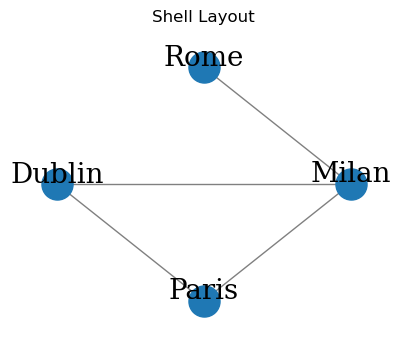

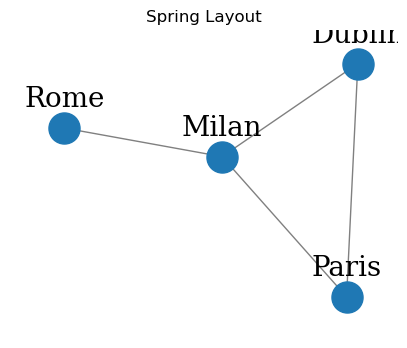

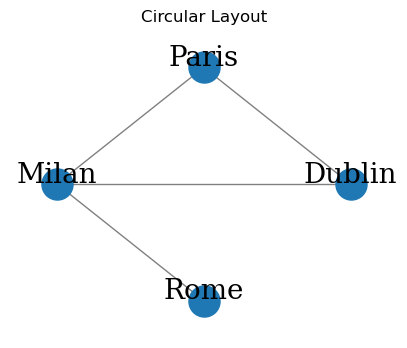

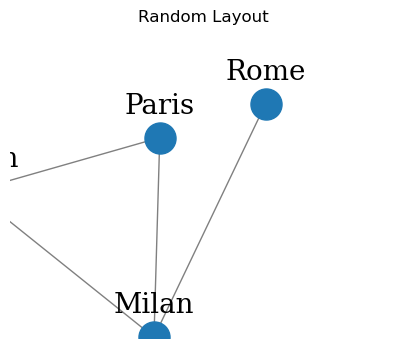

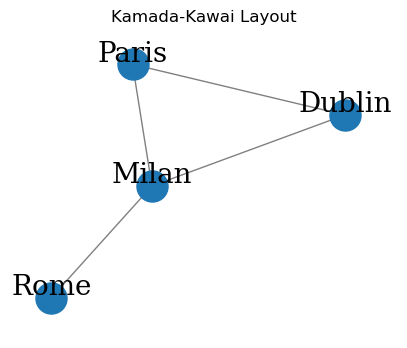

In [11]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Paris', 'Dublin'), ('Milan', 'Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

# Define layout methods
layouts = {
    'Shell Layout': nx.shell_layout(G),
    'Spring Layout': nx.spring_layout(G, seed=42),
    'Circular Layout': nx.circular_layout(G),
    'Random Layout': nx.random_layout(G),
    'Kamada-Kawai Layout': nx.kamada_kawai_layout(G)
}

# Draw graph with each layout
for title, pos in layouts.items():
    plt.figure(figsize=(5, 4))
    plt.title(title)
    draw_graph(G, pos_nodes=pos, node_size=500)
    plt.show()


In [14]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')]


In [15]:
{G.degree(v): v for v in G.nodes}

{2: 'Paris', 3: 'Milan', 1: 'Rome'}

### Graph order
The order of a graph is the number of its vertices |V|. The size of a graph is the 
number of its edges |E|.

### Node degree
The degree of a vertex is the number of edges that are adjacent to it. The neighbors of 
a vertex v in a graph G is a subset of vertex V' induced by all vertices adjacent to v.

In [16]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Dublin': 2, 'Paris': 2, 'Milan': 3, 'Rome': 1}
Neighbors for nodes: {'Dublin': ['Milan', 'Paris'], 'Paris': ['Milan', 'Dublin'], 'Milan': ['Dublin', 'Paris', 'Rome'], 'Rome': ['Milan']}


### Ego graph
The neighborhood graph (also known as an ego graph) of a vertex v in a graph G
is a subgraph of G, composed of the vertices adjacent to v and all edges connecting 
vertices adjacent to v.

In [17]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Dublin', 'Paris', 'Milan', 'Rome']
Edges: [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')]


### Add nodes and eddges

In [21]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Paris', 'Milan', 'Rome', 'Madrid', 'London']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Paris', 'Madrid'), ('Milan', 'Rome'), ('Rome', 'London')]


### Remove nodes and eddges

In [8]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Milan', 'Dublin', 'Rome']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Milan', 'Dublin'), ('Milan', 'Rome')]


In [9]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Paris', 'Milan', 'Dublin', 'Rome']
E = [('Paris', 'Dublin'), ('Milan', 'Rome')]


In [10]:
print(nx.to_edgelist(G))

[('Paris', 'Dublin', {}), ('Milan', 'Rome', {})]


In [11]:
print(nx.to_pandas_adjacency(G))

        Paris  Milan  Dublin  Rome
Paris     0.0    0.0     1.0   0.0
Milan     0.0    0.0     0.0   1.0
Dublin    1.0    0.0     0.0   0.0
Rome      0.0    1.0     0.0   0.0


## Directed Graph

In [12]:
import networkx as nx
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

  source  target
0  Paris   Milan
1  Paris  Dublin
2  Milan  Dublin
3  Milan    Rome
        Paris  Milan  Dublin  Rome
Paris     0.0    1.0     1.0   0.0
Milan     0.0    0.0     1.0   1.0
Dublin    0.0    0.0     0.0   0.0
Rome      0.0    0.0     0.0   0.0


In [13]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Paris': 0, 'Milan': 1, 'Dublin': 2, 'Rome': 1}
Outegree for nodes: {'Paris': 2, 'Milan': 2, 'Dublin': 0, 'Rome': 0}


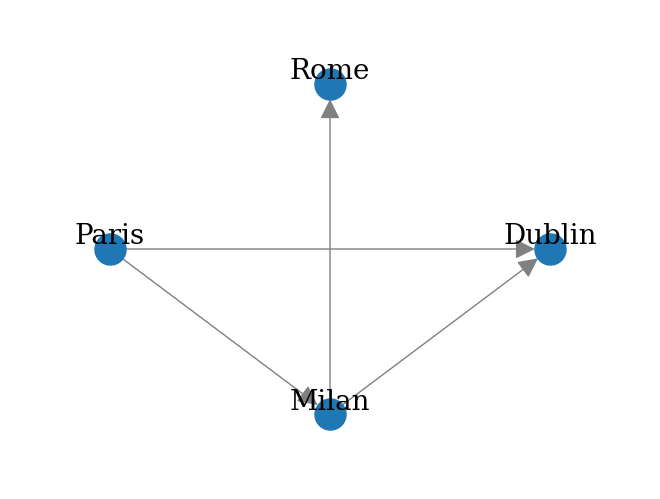

In [14]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

## Weighted Directed Graph

### Multigraph
We will now introduce the multigraph object, which is a generalization of the graph 
definition that allows multiple edges to have the same pair of start and end nodes.

  source  target  weight
0  Paris  Dublin      11
1  Paris   Milan       8
2  Milan    Rome       5
3  Milan  Dublin      19
        Paris  Milan  Dublin  Rome
Paris     0.0    8.0    11.0   0.0
Milan     0.0    0.0    19.0   5.0
Dublin    0.0    0.0     0.0   0.0
Rome      0.0    0.0     0.0   0.0


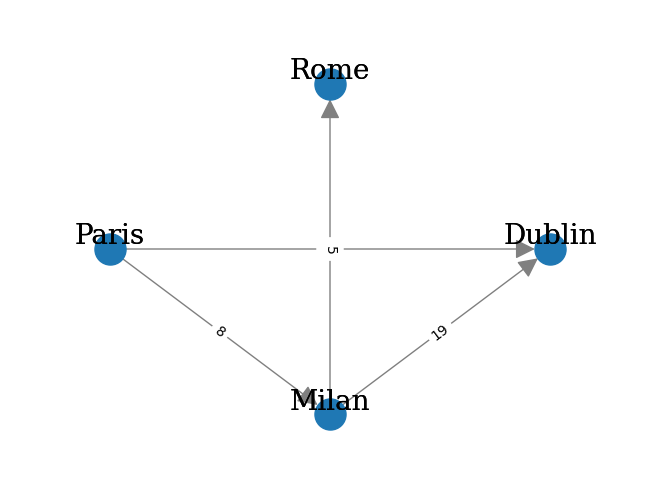

In [15]:
import networkx as nx
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

## Bipartite Graph
Edges are only allowed across different sets and are not allowed within nodes belonging 
to the same set.

In [19]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),  
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

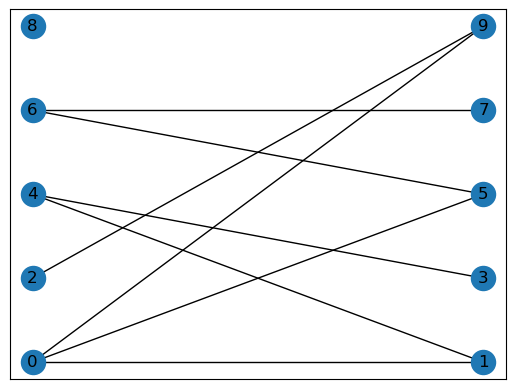

In [20]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

## Multi Graph

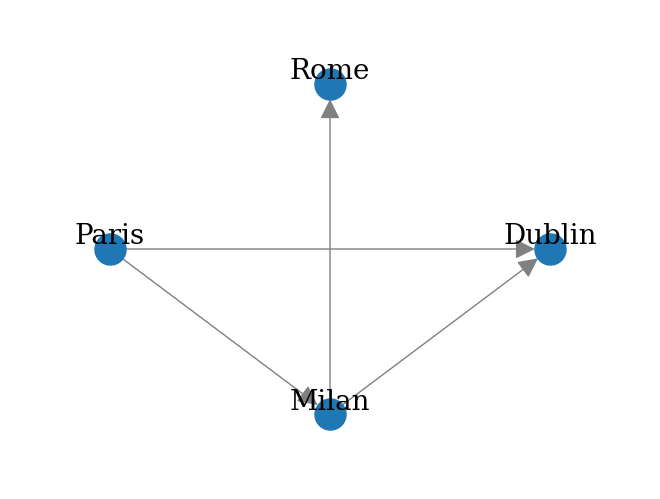

In [18]:
import networkx as nx
directed_multi_graph = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)